<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


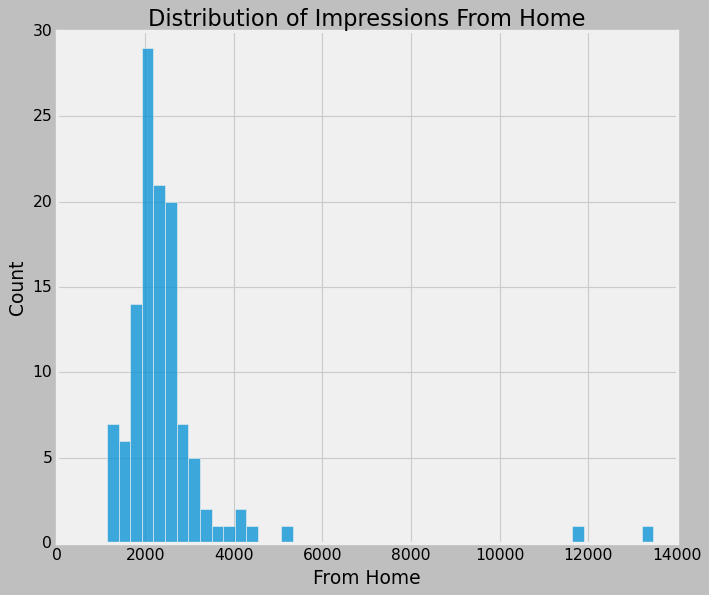

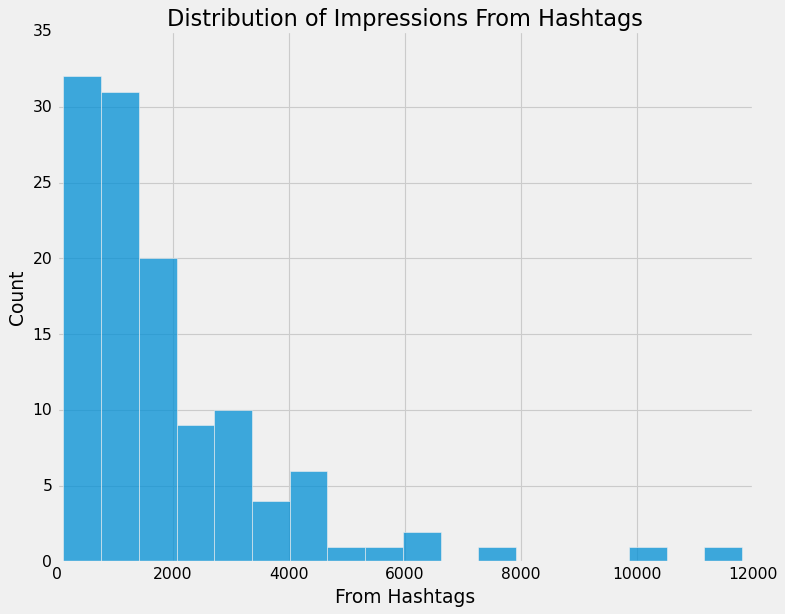

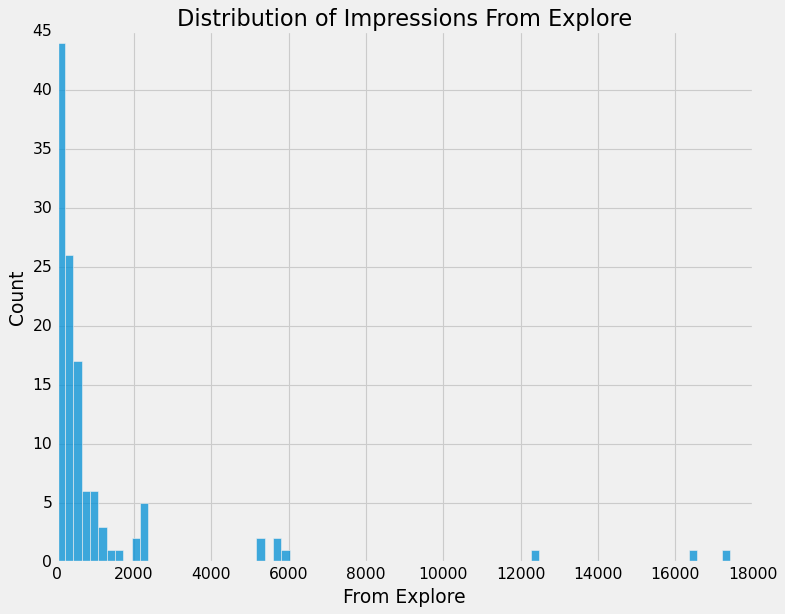

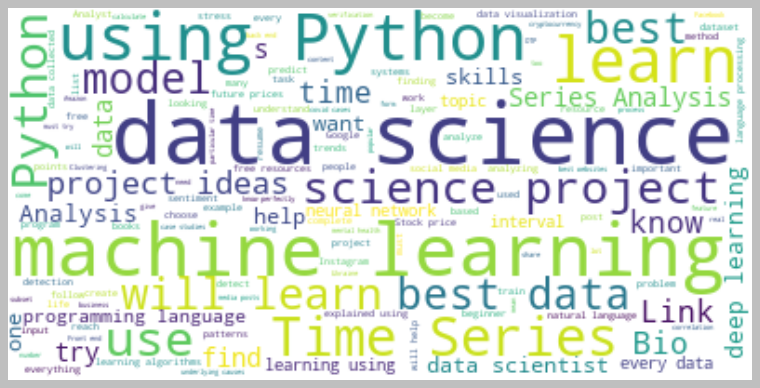

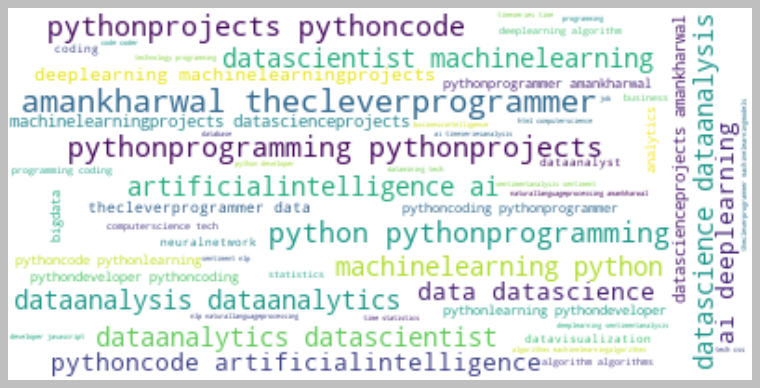

Impressions       1.000000
From Explore      0.893607
Follows           0.889363
Likes             0.849835
From Home         0.844698
Saves             0.779231
Profile Visits    0.760981
Shares            0.634675
From Other        0.592960
From Hashtags     0.560760
Comments         -0.028524
Name: Impressions, dtype: float64
41.00265604249668


In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.linear_model import PassiveAggressiveRegressor, PassiveAggressiveClassifier
from sklearn.model_selection import train_test_split

# Read data
data = pd.read_csv('Instagram data.csv',encoding="latin1")
data.head()

#Check for NULL values
data.isnull().sum()
data= data.dropna()
data.info()

plt.figure(figsize=(10, 8))
plt.style.use('fivethirtyeight')
plt.title("Distribution of Impressions From Home")
#sns.distplot(data['From Home'])
sns.histplot(data['From Home'])
plt.show()

plt.figure(figsize=(10, 8))
plt.title("Distribution of Impressions From Hashtags")
#sns.distplot(data['From Hashtags'])
sns.histplot(data['From Hashtags'])
plt.show()

plt.figure(figsize=(10, 8))
plt.title("Distribution of Impressions From Explore")
#sns.distplot(data['From Explore'])
sns.histplot(data['From Explore'])
plt.show()


home = data["From Home"].sum()
hashtags = data["From Hashtags"].sum()
explore = data["From Explore"].sum()
other = data["From Other"].sum()
labels = ['From Home','From Hashtags','From Explore','Other']
values = [home, hashtags, explore, other]
fig = px.pie(data, values=values, names=labels, 
title='Impressions on Instagram Posts From Various Sources', hole=0.5)
fig.show()

text = " ".join(i for i in data.Caption)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.style.use('classic')
plt.figure( figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

text = " ".join(i for i in data.Hashtags)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#Analyzing Relationships
figure = px.scatter(data_frame = data, x="Impressions",y="Likes", size="Likes", trendline="ols",title = "Relationship Between Likes and Impressions")
figure.show()

figure = px.scatter(data_frame = data, x="Impressions",y="Comments", size="Comments", trendline="ols",title = "Relationship Between Comments and Total Impressions")
figure.show()

figure = px.scatter(data_frame = data, x="Impressions",y="Shares", size="Shares", trendline="ols", title = "Relationship Between Shares and Total Impressions")
figure.show()

# Finding Correlation
correlation =data.corr(numeric_only = [True])
print(correlation["Impressions"].sort_values(ascending=False))

#Analyzing Conversion Rate
conversion_rate = (data["Follows"].sum() / data["Profile Visits"].sum()) * 100
print(conversion_rate)

figure = px.scatter(data_frame = data, x="Profile Visits",y="Follows", size="Follows", trendline="ols", title = "Relationship Between Profile Visits and Followers Gained")
figure.show()






